# **Telecom X - Análisis de Evasión de Clientes**

### 🛫 Descripción del proyecto 🛫

_El desafío TelecomX forma parte de la formación de Data Science del programa ONE, especificamente del curso Aprendiendo hacer ETL_.

_La empresa de telecomunicaciones está enfrentando una alta tasa de cancelación y necesita comprender los factores que llevan a la pérdida de clientes_.

_El challenge consiste en recopilar, procesar y analizar los datos utilizando las bibliotecas Pandas, Matplotlib y Seaborn, con el objetivo de identificar los factores que están influyendo en la baja de clientes_.

_Para conocer qué razones están llevando a los clientes a darse de baja en primer lugar, hubo que extraer los datos desde una API, en segundo lugar tuvimos que limpiar los errores, así como también, hacer transformaciones necesarias para el próximo paso, el análisis de los datos. Por último, confeccionamos un informe con los pasos que se aplicaron para realizar el análisis, los resultados y las recomendaciones para afrontar el problema de las cancelaciones_.

#📌 Extracción

In [ ]:
import pandas as pd
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [ ]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'


In [ ]:
from re import error
try:
  peticion = requests.get(url)

  peticion.raise_for_status()

  clientes_json = json.loads(peticion.text)

  df_clientes = pd.json_normalize(clientes_json)

except error as e:
  print(e)


In [ ]:
df_clientes.info()

In [ ]:
df_clientes.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [ ]:
columnas = list(df_clientes.columns)

columnas.remove('customer.tenure')
columnas.remove('customer.SeniorCitizen')
columnas.remove('account.Charges.Monthly')
columnas.pop()

In [ ]:
#Búsqueda de valores vacios
for columna in columnas:
  print(f'{columna}: {df_clientes[columna].unique()}')



customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
customer.gender: ['Female' 'Male']
customer.Partner: ['Yes' 'No']
customer.Dependents: ['Yes' 'No']
phone.PhoneService: ['Yes' 'No']
phone.MultipleLines: ['No' 'Yes' 'No phone service']
internet.InternetService: ['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity: ['No' 'Yes' 'No internet service']
internet.OnlineBackup: ['Yes' 'No' 'No internet service']
internet.DeviceProtection: ['No' 'Yes' 'No internet service']
internet.TechSupport: ['Yes' 'No' 'No internet service']
internet.StreamingTV: ['Yes' 'No' 'No internet service']
internet.StreamingMovies: ['No' 'Yes' 'No internet service']
account.Contract: ['One year' 'Month-to-month' 'Two year']
account.PaperlessBilling: ['Yes' 'No']
account.PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [ ]:
#Búsqueda de valores vacíos en la columna Churn
valores_vacios_churn = (df_clientes['Churn'] == '').sum()

valores_vacios_churn

In [ ]:
#Reemplazo de valores vacíos por NaN en la columna Churn
df_clientes['Churn'] = df_clientes['Churn'].replace('', np.nan)


In [ ]:
df_clientes['Churn'].unique()

In [ ]:
#Eliminar valores  NaN en la columna Churn
df_clientes.dropna(inplace=True)

In [ ]:
df_clientes['Churn'].unique()

In [ ]:
#Contar valores vacíos en la columna account.Charges.Total
valores_vacios = (df_clientes['account.Charges.Total'] == ' ').sum()

In [ ]:
valores_vacios

In [ ]:
#Reemplazar los valores vacíos por nan y luego convertir la columna al tipo de dato float
df_clientes['account.Charges.Total'] = df_clientes['account.Charges.Total'].replace(' ', np.nan)

df_clientes['account.Charges.Total'] = df_clientes['account.Charges.Total'].astype(np.float64)

df_clientes['account.Charges.Total'].isna().sum()

In [ ]:
#Averguar la permanencia de los clientes con datos faltantes en la columna cargos totales
df_clientes[df_clientes['account.Charges.Total'].isna() == True ]

In [ ]:
#Averiguar si hay duplicados
df_clientes.duplicated().sum()

In [ ]:
#Incosistencia en la categoría internet service
df_clientes['internet.InternetService'] = df_clientes['internet.InternetService'].replace('No', 'No internet service')

In [ ]:
#Incosistencia en la categoría contract
df_clientes['account.Contract'] = df_clientes['account.Contract'].str.replace('\s', '-', regex=True)

In [ ]:
#Incosistencia en la categoría payment method
df_clientes['account.PaymentMethod'] = df_clientes['account.PaymentMethod'].str.replace('\(\w+\)', '', regex=True).str.strip() #también se puede usar \[a-z]+ en lugar de \w+
df_clientes['account.PaymentMethod'].unique()

In [ ]:
#Cambiar los datos string a minúsculas
df_clientes[columnas] = df_clientes[columnas].apply(lambda x: x.str.lower())
df_clientes

In [ ]:
#Cálculo de la columna cuentas diarias
dias_mes = 30
df_clientes['cuentas_diarias'] = df_clientes['account.Charges.Monthly'] / dias_mes

df_clientes

In [ ]:
df_clientes.columns

In [ ]:
#Cambio de nombres de las columnas de la tabla
df_clientes.rename({'customer.gender':'Gender',
                    'customer.SeniorCitizen':'SeniorCitizen',
                    'customer.Partner':'Partner',
                    'customer.Dependents':'Dependents',
                    'customer.tenure':'Tenure',
                    'phone.PhoneService':'PhoneService',
                    'phone.MultipleLines':'MultipleLines',
                    'internet.InternetService':'InternetService',
                    'internet.OnlineSecurity':'OnlineSecurity',
                    'internet.OnlineBackup':'OnlineBackup',
                    'internet.DeviceProtection':'DeviceProtection',
                    'internet.TechSupport':'TechSupport',
                    'internet.StreamingTV':'StreamingTV',
                    'internet.StreamingMovies':'StreamingMovies',
                    'account.Contract':'Contract',
                    'account.PaperlessBilling':'PaperlessBilling',
                    'account.PaymentMethod':'PaymentMethod',
                    'account.Charges.Monthly':'ChargesMonthly',
                    'account.Charges.Total':'ChargesTotal',
                    'cuentas_diarias':'CuentasDiarias' },
                    axis=1, inplace=True)



In [ ]:
df_clientes.columns

#📊 Carga y análisis

In [ ]:
#Métricas de variables continuas
df_clientes[['Tenure', 'ChargesMonthly','ChargesTotal', 'CuentasDiarias']].describe()

In [ ]:
#Métricas de variables categóricas
df_clientes[['Churn','Gender', 'Partner','Dependents','PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies','Contract', 'PaymentMethod']].describe()

In [ ]:
#Frecuencia clientes que se dieron de baja y los que no se dieron de baja
frecuencia_churn = df_clientes['Churn'].value_counts()
etiquetas_churn = ['No', 'Sí']
colores = ['#37513D','#FA1B22']

fig, ax = plt.subplots(figsize=(6,3))
ax.pie(frecuencia_churn, labels=etiquetas_churn, colors=colores, autopct='%1.1f%%',  textprops=dict(color="w"))

ax.set_title('Proporción de evasión de clientes', loc='center', fontsize=14, fontweight='bold')

ax.legend(title="¿Se dieron de baja?", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.figtext(0.5, 0.05,"Fig 3.1: Porcentaje de clientes que no dieron y se dieron de baja",
            ha="center", fontsize=9, bbox={"facecolor":"lightgray", "alpha":0.5, "pad":5})

plt.show()

In [ ]:
#Recuento de evasión por género
churn_genero = df_clientes.groupby(['Gender','Churn'])['Churn'].count().to_frame()

churn_genero.rename({'Churn':'Counts'}, axis=1, inplace=True)

churn_genero.reset_index(inplace=True)

churn_genero.sort_values(by='Counts', ascending=False, inplace=True)

churn_genero

In [ ]:
#¿El género influye en la evasión de clientes? Hipótesis 1: el genéro no influye en la evasión de clientes
hipotesis_genero = pd.crosstab(df_clientes['Gender'], df_clientes['Churn'],  normalize='index')

In [ ]:
hipotesis_genero = hipotesis_genero.reset_index()

hipotesis_genero.sort_values(by='yes', ascending=True, inplace=True)

In [ ]:
sns.set_palette(sns.color_palette('PiYG'))

In [ ]:
#Gráficos de evasión por género
# Recuento de evasión por género
fig, axs = plt.subplots(1,2, figsize=(12,6))
sns.barplot(ax=axs[0], data=churn_genero, x='Gender', y='Counts', hue='Churn', palette='PiYG_r')
axs[0].set_title('Evasión por género', fontsize=12, fontweight='bold')
axs[0].set_xlabel('Género', fontsize=10, fontweight='bold', loc='right')
axs[0].set_ylabel('Número de clientes', fontsize=10, fontweight='bold')

axs[0].set_ylim(0,3000)
axs[0].yaxis.set_minor_locator(ticker.AutoMinorLocator())

axs[0].spines[['top', 'right']].set_visible(False)
axs[0].legend(title='Churn' )

#Tasa de evasión por género
sns.barplot(ax=axs[1], data=hipotesis_genero, x='Gender', y='yes', hue='Gender')
axs[1].set_title('Tasa de evasión por género', fontsize=12, fontweight='bold')
axs[1].set_xlabel('', fontsize=10, fontweight='bold')
axs[1].set_ylabel('Tasa de abandono', fontsize=10, fontweight='bold')
axs[1].set_ylim(0,1)
axs[1].yaxis.set_minor_locator(ticker.AutoMinorLocator())

axs[1].spines[['top', 'right']].set_visible(False)

plt.show()

In [ ]:
#Recuento de evasión por contrato
churn_contrato = df_clientes.groupby(['Contract','Churn'])['Churn'].count().to_frame()

churn_contrato.rename({'Churn':'Counts'}, axis=1, inplace=True)

churn_contrato.reset_index(inplace=True)

churn_contrato.sort_values(by='Counts', ascending=False, inplace=True)

churn_contrato

In [ ]:
#Hipótesis 2: El tipo de contrato influye en la evasión de los clientes
hipotesis_contrato = pd.crosstab(df_clientes['Contract'], df_clientes['Churn'],  normalize='index')

hipotesis_contrato

In [ ]:
#Gráfico de evasión por contrato
fig, axs = plt.subplots(1,2, figsize=(14,6))
sns.barplot(ax=axs[0], data=churn_contrato, x='Contract', y='Counts', hue='Churn', palette='PiYG_r')
axs[0].set_title('Evasión por contrato',  fontsize=12, fontweight='bold')
axs[0].set_xlabel('',  fontsize=10, fontweight='bold')
axs[0].set_ylabel('Número de clientes',  fontsize=10, fontweight='bold')

axs[0].set_ylim(0,3000)
axs[0].yaxis.set_minor_locator(ticker.AutoMinorLocator())

axs[0].spines[['top', 'right']].set_visible(False)
axs[0].legend(title='Churn' )
#Gráfico tasa de cancelación
sns.barplot(ax=axs[1], data=hipotesis_contrato, x='Contract', y='yes', hue='Contract')
axs[1].set_title('Tasa de evasión por contrato', fontsize=12, fontweight='bold')
axs[1].set_xlabel('Tipo de contrato', fontsize=10, fontweight='bold', loc='left')
axs[1].set_ylabel('Tasa de evasión', fontsize=10, fontweight='bold')

axs[1].set_ylim(0,1)
axs[1].yaxis.set_minor_locator(ticker.AutoMinorLocator())

axs[1].spines[['top', 'right']].set_visible(False)

plt.tight_layout()

plt.show()


In [ ]:
#Recuento de evasión por contrato
churn_pago = df_clientes.groupby(['PaymentMethod','Churn'])['Churn'].count().to_frame()

churn_pago.rename({'Churn':'Counts'}, axis=1, inplace=True)

churn_pago.reset_index(inplace=True)

churn_pago

In [ ]:
#Hipótesis 3: El tipo de pago influye en la evasión de los clientes
hipotesis_pago = pd.crosstab(df_clientes['PaymentMethod'], df_clientes['Churn'],  normalize='index')

hipotesis_pago.sort_values('yes', ascending=False, inplace=True)

hipotesis_pago

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(14,6))
#Grafico evasión por tipo de pago
sns.barplot(ax=axs[0], data=churn_pago, x='PaymentMethod', y='Counts', hue='Churn', palette='PiYG_r')
axs[0].set_title('Evasión por método de pago',  fontsize=12, fontweight='bold')
axs[0].set_xlabel('Método de pago',  fontsize=10, fontweight='bold', loc='right')
axs[0].set_ylabel('Número de clientes',  fontsize=10, fontweight='bold')

axs[0].set_ylim(0,2000)
axs[0].yaxis.set_minor_locator(ticker.AutoMinorLocator())

axs[0].spines[['top', 'right']].set_visible(False)
axs[0].legend(title='Churn')
#Gráfico tasa de cancelación por tipo de pago
sns.barplot(ax=axs[1], data=hipotesis_pago, x='PaymentMethod', y='yes', hue='PaymentMethod')
axs[1].set_title('Tasa de evasión por método de pago', fontsize=12, fontweight='bold')
axs[1].set_xlabel('', fontsize=10, fontweight='bold')
axs[1].set_ylabel('Proporción de evasión', fontsize=10, fontweight='bold')

axs[1].set_ylim(0,1)
axs[1].yaxis.set_minor_locator(ticker.AutoMinorLocator())

axs[1].spines[['top', 'right']].set_visible(False)
#axs[0].legend(titulo='Método de pago')

plt.tight_layout()

plt.show()

In [ ]:
#Recuento de evasión por servicio de internet
churn_internet = df_clientes.groupby(['InternetService','Churn'])['Churn'].count().to_frame()

churn_internet.rename({'Churn':'Counts'}, axis=1, inplace=True)

churn_internet.reset_index(inplace=True)

churn_internet

,InternetService,Churn,Counts
0,dsl,no,1962
1,dsl,yes,459
2,fiber optic,no,1799
3,fiber optic,yes,1297
4,no internet service,no,1413
5,no internet service,yes,113


In [ ]:
#Hipótesis 4: El tipo de pago influye en la evasión de los clientes
hipotesis_internet = pd.crosstab(df_clientes['InternetService'], df_clientes['Churn'],  normalize='index')

hipotesis_internet.sort_values(by='yes', ascending=False, inplace=True)

hipotesis_internet

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(14,6), sharex=True)
#Grafico evasión por tipo de internet
sns.barplot(ax=axs[0], data=churn_internet, x='InternetService', y='Counts', hue='Churn', palette='PiYG_r')
axs[0].set_title('Evasión por servicio de internet',  fontsize=12, fontweight='bold')
axs[0].set_xlabel('Servicio de internet',  fontsize=10, fontweight='bold', loc='right')
axs[0].set_ylabel('Número de clientes',  fontsize=10, fontweight='bold')

axs[0].set_ylim(0,2000)
axs[0].yaxis.set_minor_locator(ticker.AutoMinorLocator())

axs[0].spines[['top', 'right']].set_visible(False)
axs[0].legend(title='Churn')

#Tasa de cancelación por tipo de internet
sns.barplot(ax=axs[1], data=hipotesis_internet, x='InternetService', y='yes', hue='InternetService')
axs[1].set_title('Tasa de evasión por servicio de internet', fontsize=12, fontweight='bold')
axs[1].set_xlabel('', fontsize=10, fontweight='bold')
axs[1].set_ylabel('Proporción de evasión(%)', fontsize=10, fontweight='bold')

axs[1].set_ylim(0,1)
axs[1].yaxis.set_minor_locator(ticker.AutoMinorLocator())

axs[1].spines[['top', 'right']].set_visible(False)
#axs[0].legend(titulo='Método de pago')

plt.tight_layout()

plt.show()

In [ ]:
#Recuento de evasión por servicio de internet
churn_telefono = df_clientes.groupby(['PhoneService','Churn'])['Churn'].count().to_frame()

churn_telefono.rename({'Churn':'Counts'}, axis=1, inplace=True)

churn_telefono.reset_index(inplace=True)

churn_telefono

In [ ]:
#Hipótesis 5: El servicio de teléfono no influye en la evasión de los clientes
hipotesis_telefono = pd.crosstab(df_clientes['PhoneService'], df_clientes['Churn'],  normalize='index')

hipotesis_telefono.sort_values(by='yes', ascending=False, inplace=True)

hipotesis_telefono

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(14,6), sharex=True)
#Gráfico de evasión por servicio telefónico
sns.barplot(ax=axs[0], data=churn_telefono, x='PhoneService', y='Counts', hue='Churn', palette='PiYG_r')
axs[0].set_title('Evasión por servicio de teléfono',  fontsize=12, fontweight='bold')
axs[0].set_xlabel('Servicio de teléfono',  fontsize=10, fontweight='bold', loc='right')
axs[0].set_ylabel('Número de clientes',  fontsize=10, fontweight='bold')

axs[0].set_ylim(0,5000)
axs[0].yaxis.set_minor_locator(ticker.AutoMinorLocator())

axs[0].spines[['top', 'right']].set_visible(False)
axs[0].legend(title='Churn')
#Tasa de baja por servicio telefónico
sns.barplot(ax=axs[1], data=hipotesis_telefono, x='PhoneService', y='yes', hue='PhoneService')
axs[1].set_title('Tasa de evasión de clientes que hicieron churn\n por servicio de teléfono', fontsize=12, fontweight='bold')
axs[1].set_xlabel('', fontsize=10, fontweight='bold')
axs[1].set_ylabel('Proporción de evasión(%)', fontsize=10, fontweight='bold')

axs[1].set_ylim(0,1)
axs[1].yaxis.set_minor_locator(ticker.AutoMinorLocator())

axs[1].spines[['top', 'right']].set_visible(False)
#axs[0].legend(titulo='Método de pago')

plt.tight_layout()

plt.show()

In [ ]:
df_edad = df_clientes[['Churn','SeniorCitizen']]

df_edad['Mayor 65'] = np.where(df_edad['SeniorCitizen'] == 0, 'Menor que 65', 'Mayor que 65')

In [ ]:
#Recuento de evasión por edad
churn_edad = df_edad.groupby(['Mayor 65','Churn'])['Churn'].count().to_frame()

churn_edad.rename({'Churn':'Counts'}, axis=1, inplace=True)

churn_edad.reset_index(inplace=True)

churn_edad

In [ ]:
#Hipótesis 5: La edad influye en la evasión de los clientes
hipotesis_edad = df_clientes[['Churn', 'SeniorCitizen']].copy()

hipotesis_edad['Mayor 65'] = np.where(hipotesis_edad['SeniorCitizen'] == 0, 'Menor que 65', 'Mayor que 65')

hip_edad = pd.crosstab(hipotesis_edad['Mayor 65'], hipotesis_edad['Churn'], normalize='index')

hip_edad

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(14,6), sharex=True)
#Gráfico de evasión por edad
sns.barplot(ax=axs[0],data=churn_edad, x='Mayor 65', y='Counts', hue='Churn', palette='PiYG_r')
axs[0].set_title('Evasión por edad', fontsize=11, fontweight='bold')
axs[0].set_xlabel('Edad', fontsize=10, fontweight='bold', loc='right')
axs[0].set_ylabel('Número de clientes', fontsize=10, fontweight='bold')

axs[0].set_ylim(0,5000)
axs[0].yaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[0].spines[['top', 'right']].set_visible(False)
#Tasa de cancelación por edad
sns.barplot(ax=axs[1],data=hip_edad, x='Mayor 65', y='yes', hue='Mayor 65')
axs[1].set_title('Tasa de evasión para clientes\n que hiceron churn', fontsize=10, fontweight='bold')
axs[1].set_xlabel('')
axs[1].set_ylabel('')

axs[1].set_ylim(0,1)
axs[1].yaxis.set_minor_locator(ticker.AutoMinorLocator())

axs[1].spines[['top', 'right']].set_visible(False)

#axs[1].legend(title='Método de pago')

plt.show()

In [ ]:
#Gráfico de evasión por permanencia
fig, ax = plt.subplots()
ax = sns.boxplot(df_clientes, x='Churn', y='Tenure', hue='Churn', palette='PiYG_r')
ax.set_title('Evasión por permanencia', fontsize=12, fontweight='bold')
ax.set_xlabel('Cancelación', fontsize=10, fontweight='bold')
ax.set_ylabel('Meses de permanencia', fontsize=10, fontweight='bold')

ax.set_ylim(0,80)
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

ax.spines[['top', 'right']].set_visible(False)

plt.show()

In [ ]:
#Cálculo de promedio del tiempo que se quedaron los que no se fueron
churn_no = df_clientes['Churn'] == 'no'

churn_tenure = df_clientes[['Churn', 'Tenure']]

churn_no = churn_tenure[churn_no]

churn_no['Tenure'].mean()

In [ ]:
#Identificar valores atípicos en los churners
churn_yes = df_clientes['Churn'] == 'yes'

churn_tenure = df_clientes[['Churn', 'Tenure']]

churn_yes = churn_tenure[churn_yes]

q3,q1 = np.percentile(churn_yes['Tenure'], [75, 25])

ric = q3 - q1

ric

#Detectar valores atípicos

q_inferior = q1 - 1.5 * ric
q_superior = q3 + 1.5 * ric

valores_atipicos = (churn_yes['Tenure'] < q_inferior) | (churn_yes['Tenure'] > q_superior)

churn_yes[valores_atipicos]

#Conclusión: los valores atípicos son los clientes que se dieron de baja entre 70-72 meses


In [ ]:
#Cálculo de promedio del tiempo que se quedaron los que se fueron
churn_yes['Tenure'].mean()

In [ ]:
#Gráfico de evasión por charges total
fig, ax = plt.subplots()
ax = sns.boxplot(df_clientes, x='Churn', y='ChargesTotal', hue='Churn', palette='PiYG_r')
ax.set_title('Total facturado por clientes que se dieron\ny no se dieron la baja', fontsize=12, fontweight='bold')
ax.set_xlabel('Cancelación',  fontsize=10, fontweight='bold')
ax.set_ylabel('Gastos total',  fontsize=10, fontweight='bold')

ax.set_ylim(0,9000)
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

ax.spines[['top', 'right']].set_visible(False)

plt.show()

In [ ]:
#Identificar valores atípicos
churn_yes = df_clientes['Churn'] == 'yes'

churn_charges = df_clientes[['Churn', 'ChargesTotal']]

churn_yes = churn_charges[churn_yes]

q3,q1 = np.percentile(churn_yes['ChargesTotal'], [75, 25])

ric = q3 - q1

ric

#Detectar valores atípicos

q_inferior = q1 - 1.5 * ric
q_superior = q3 + 1.5 * ric

valores_atipicos = (churn_yes['ChargesTotal'] < q_inferior) | (churn_yes['ChargesTotal'] > q_superior)

churn_yes[valores_atipicos]





In [ ]:
#Cálculo de promedio del cargo total que pagaron los que  se fueron
churn_yes['ChargesTotal'].mean()

In [ ]:
#Cálculo de promedio del cargo total que pagaron los que no se fueron
churn_no = df_clientes['Churn'] == 'no'

churn_charges_no = df_clientes[['Churn', 'ChargesTotal']]

churn_no = churn_charges[churn_no]

In [ ]:
churn_no['ChargesTotal'].mean()

In [ ]:
#Cálculo del los cargos mensuales promedio de no churners
df = df_clientes[['Churn', 'Contract', 'Tenure','ChargesMonthly']]

filtro_yes = df['Churn'] == 'yes'
filtro_no =  df['Churn'] == 'no'

charges_mon_no = df[filtro_no]
charges_mon_no['ChargesMonthly'].mean()

In [ ]:
#Cálculo del los cargos mensuales promedio de churners
charges_mon_yes = df[filtro_yes]
charges_mon_yes['ChargesMonthly'].mean()


In [ ]:
#Distribución de cargos mensuales por churners y no churners
fig, ax = plt.subplots()
ax = sns.boxplot(df_clientes, x='Churn', y='ChargesMonthly', hue='Churn', palette='PiYG_r')
ax.set_title('Evasión por cargos mensuales', fontsize=12, fontweight='bold')
ax.set_xlabel('Baja', fontsize=10, fontweight='bold')
ax.set_ylabel('Cargos mensuales', fontsize=10, fontweight='bold')

ax.set_ylim(0, 130)
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

ax.spines[['top', 'right']].set_visible(False)

plt.show()

In [ ]:
#Calcular la cantidad de servicio de un cliente
servicios = df_clientes[['PhoneService', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']]
servicios_columnas = servicios.columns

servicios = servicios[servicios_columnas].map(lambda x: 1 if x == 'yes' else 0)

servicios['Churn'] = np.where(df_clientes['Churn'] == 'yes', 1, 0)

servicios['numero_servicios'] = servicios[servicios_columnas].sum(axis=1)


In [ ]:
#Gráfico del número de servicios por cliente
fig, ax = plt.subplots()
ax = sns.boxplot(servicios, x='Churn', y='numero_servicios', hue='Churn', palette='PiYG_r')
ax.set_title('Número de servicios por cliente ', fontsize=12, fontweight='bold' )
ax.set_xlabel('Baja', fontsize=10, fontweight='bold' )
ax.set_ylabel('Cantidad de servicios', fontsize=10, fontweight='bold')

ax.set_ylim(0, 10)
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))

ax.spines[['top', 'right']].set_visible(False)

plt.show()

In [ ]:
#Frecuencia relativa entre número de servicios y evasión
churn_servicios = pd.crosstab(servicios['numero_servicios'], servicios['Churn'], normalize='index')
churn_servicios.rename({0:'No', 1:'Yes'}, axis=1, inplace=True)

In [ ]:
#Gráfico de frecuencias relativas de número de servicios y evasión
posiciones = churn_servicios.index.tolist()
nombres = ['0','1','2','3','4','5','6','7','8']
ancho_barra = 1

plt.bar(posiciones, churn_servicios['Yes'], color='#ecacd4', edgecolor='white', width=ancho_barra, label='Yes')
plt.bar(posiciones, churn_servicios['No'], bottom=churn_servicios['Yes'], color='#b4dc7c', edgecolor='white', width=ancho_barra, label='No')

plt.title('Proporción de clientes por número de servicios y churn', fontsize=12, fontweight='bold')
plt.xticks(posiciones, nombres)
plt.xlabel("Número de servicios", fontsize=10, fontweight='bold')
plt.ylabel('Proporción de clientes', fontsize=10, fontweight='bold')

plt.gca().yaxis.set_minor_locator(ticker.AutoMinorLocator())

plt.gca().spines[['top', 'right']].set_visible(False)

plt.legend(title='Churn', loc='upper right', bbox_to_anchor=(1.15, 0.75))

plt.show()

In [ ]:
#Tabla de doble entrada para servicio de internet y número de servicios solamente para los churners
servicios['InternetService'] = df_clientes['InternetService']

filtro_churn = servicios['Churn'] == 1

In [ ]:
sub_servicios = servicios[filtro_churn]
tab_servicios = pd.crosstab(sub_servicios['InternetService'], sub_servicios['numero_servicios'], normalize='index')
tab_servicios

In [ ]:
#Distribución de número de servicios por tipo de internet y churn
fig, ax = plt.subplots()
ax = sns.boxplot(servicios, x='InternetService', y='numero_servicios', hue='Churn', palette='PiYG_r')
ax.set_title('Número de servicios adicionales al servicio de internet', fontsize=12, fontweight='bold' )
ax.set_xlabel('Servicios', fontsize=10, fontweight='bold' )
ax.set_ylabel('Cantidad de servicios', fontsize=10, fontweight='bold')

ax.set_ylim(0, 10)
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))

ax.spines[['top', 'right']].set_visible(False)

plt.show()

In [ ]:
#Correlación entre número de servicios y cargos totales
correlacion = pd.DataFrame()

correlacion['n_servicios'] = servicios['numero_servicios']
correlacion['cargos_totales'] = df_clientes['ChargesTotal']

correlacion.corr()

In [ ]:
#Correlación entre permanencia y número de servicios
churn_tenure = df_clientes[['Churn', 'Tenure']]

corr_tenure_ser = pd.DataFrame()
corr_tenure_ser['Permanencia'] = churn_tenure['Tenure']
corr_tenure_ser['servicios'] = sub_servicios['numero_servicios']

corr_tenure_ser.corr()

In [ ]:
corr_tenure_ser

In [ ]:
#Gráfico de permanencia por servicio de internet y churn
tenure_internet = df_clientes[['Tenure', 'InternetService', 'Churn']]

fig, ax = plt.subplots()
ax = sns.barplot(tenure_internet, x='InternetService', y='Tenure', hue='Churn', palette='PiYG_r')
ax.set_title('Permanencia por servicio de internet', fontsize=12, fontweight='bold' )
ax.set_xlabel('Internet', fontsize=10, fontweight='bold' )
ax.set_ylabel('Permanencia', fontsize=10, fontweight='bold')

ax.set_ylim(0, 80)
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))

ax.spines[['top', 'right']].set_visible(False)

plt.show()

#📄Informe final

#**TelecomX Latinoamerica: Análisis de evasión de clientes**

## **Introducción**

La empresa TelecomX enfrenta una alta tasa de cancelaciones y quiere identificar y comprender los factores que llevan a la pérdida de clientes.

Este informe aborda dicho problema recopilando, procesando y analizando los datos, utilizando Python y las bibliotecas Pandas, Matplotlib y Seaborn para extraer información valiosa y que con ella puedan resolver el problema de la cancelación de clientes.

El análisis de los datos involucró los siguientes pasos:

1.   Extración de los datos.
2.   Limpieza y transformación de los datos.
3.   Análisis exploratorio de los datos.

A partir de los insighs obtenidos del análisis exploratorio de los datos, se obtuvieron conclusiones y se hacen recomendaciones estrategicas.










## 1. **Extracción**
 Se realizó una consulta a una API para obtener los datos. Dado que la información estaba en formato json, se tuvo que aplicar la normalización de los datos. Esto se debe a que la información se encontraba anidada.

## 2. **Transformación**
En primer lugar, se prodeció a identificar los tipos de datos de cada columna. Las columnas del tipo objeto pero que contenían valores numéricos fueron transformados al tipo float. Este fue el caso de la columna ChargesTotal.

En segundo lugar, se prodeció a averiguar si existian valores nulos o vacíos. Se encontraron solamente valores vacíos en las columnas Churn y ChargesTotal.

Los valores vacíos de Churn fueron eliminados, dado que como esta es la variable principal de análisis, así como también, porque no se contaba con la capacidad de inferir la información a partir de las otras columnas.

Los valores vacíos de ChargesTotal fueron reemplazados a NaN(not a number), ya que el resto de las columnas si aportaban información sobre el comportamiento de los clientes.

El próximo paso fue buscar valores duplicados, pero no se encontraron registros repetidos.

Luego, en la columna InternetService se reemplazó no por no internet service. Esto para que fuera consistente con las otras columnas de servicio de internet, donde una de las categorías era no internet service.

En las columnas Contract y PaymentMethod se eliminador guiones y la palabra automatic, respectivamente. Esto se hizo de esta manera para que se simplificara la información mostrada en los gráficos.

Por último, se cambiaron los nombres largos de las columnas a nombres más cortos con el objetivo de sintetizar la información que luego será representada en los gráficos.

## 3. **Carga y análisis de los datos**

En la figura 3.1 podemos ver la proporción de clientes que no se fueron de la empresa y aquellos que se fueron de la empresa. El porcentaje de clientes que no se dieron de baja es 73,5%, mientras que la proporción de clientes que se fueron fue de 26,5%.

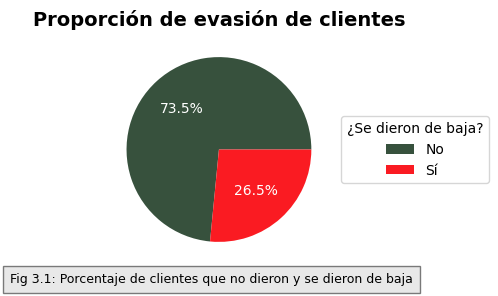

Cuando hicimos el recuento de clientes por género y churn, vemos que la cantidad de hombres y mujeres que no se dieron de baja  es mayor que los hombres y mujeres que si cancelaron el servicio(fig 3.2 izquierda). Enfocando en las personas que se dieron de baja, se observa que la cantidad de mujeres y hombres es similar (fig 3.2 izquierda). El cálculo del porcentaje confirma este hecho, el 27% de los clientes femeninos hicieron churn, mientras que el 26% de los hombres hicieron lo mismo (fig 3.2 derecha).

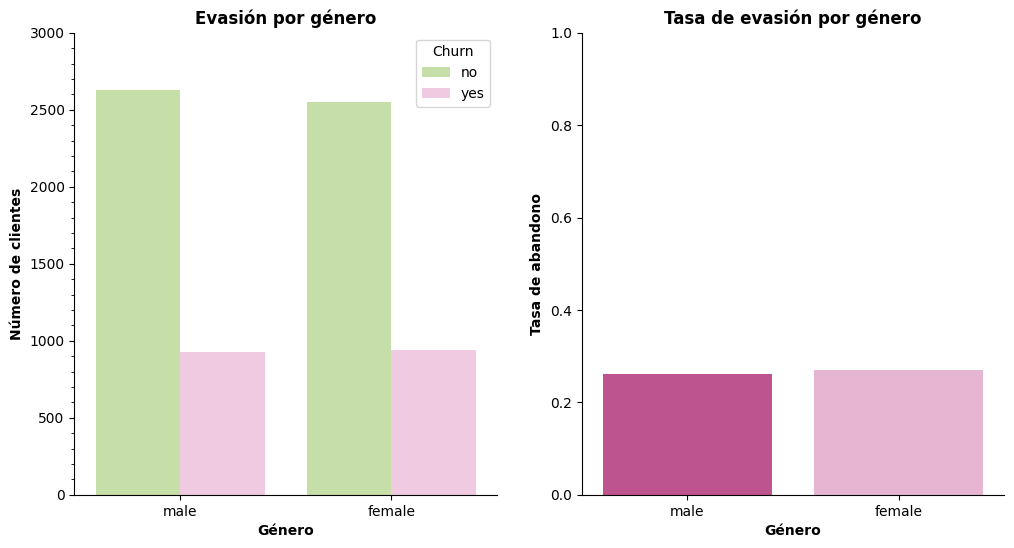
-----------------------------------------------------
Fig 3.2: A. Número de clientes por género y churn. B. Porcentaje de cancelación por sexo.


En cuanto al factor edad, observamos que los clientes que no se dieron de baja, la mayoría son menores de 65 años mientras que los clientes con más cancelaciones eran también menores de  65 años(fig. 3.3 izquierda). No obstante, las proporciones de los clientes que hiceron churn muestran que los usuarios mayores de 65 años tienen una tasa del 42%, mientras que los menores de 65 años poseen una tasa de deserción del 22%, es decir, los más de 65 años tienen una tasa que es aproximadamente el doble que los menores de 65 años(fig. 3.3 derecha).

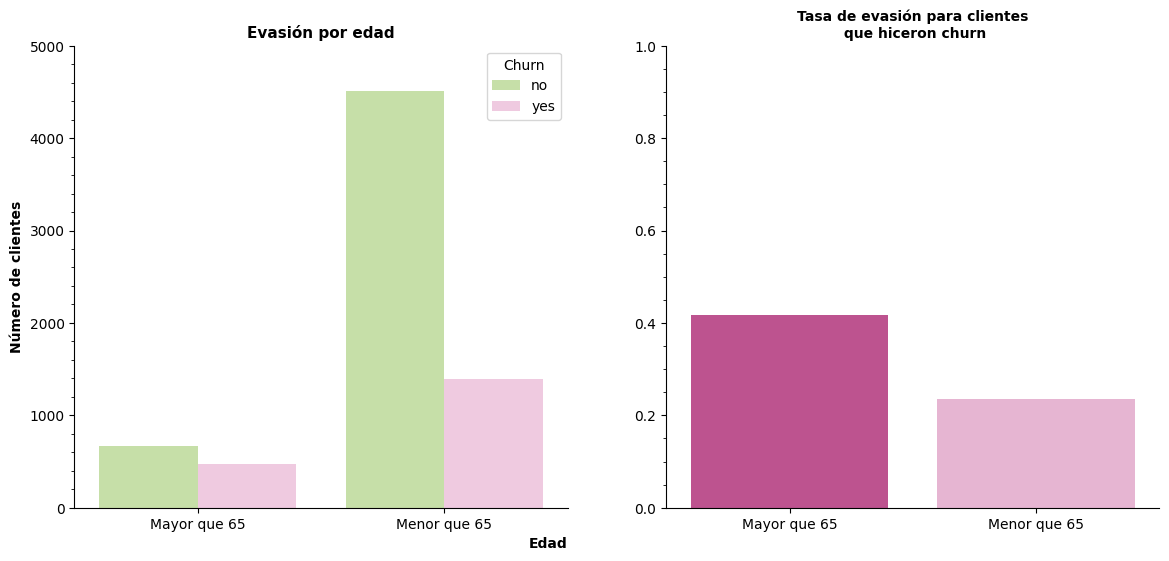
-----------------------------------------------------
Fig 3.3: A. Número de clientes por edad y churn. B. Porcentaje de baja por edad.

Analizando el tipo de contrato por evasión(figura 3.4 izquierda), se observa que los clientes que no se dieron de baja la mayoría tiene un contrato mensual, seguido de un contrato por dos años y,por último,contrato anual. En cambio, los clientes que si se dieron de baja, la mayoría tenía un contrato mensual, seguido por clientes de un año y dos años de contrato. Llamativamente, la cantidad de personas con un plan mensual que se fueron iguala a la cantidad de personas que no se fueron con contrato a dos años.

Cuando analizamos la proporción de clientes que se fueron(figura 3.4 derecha) encontramos que de los clientes con contrato mensual, el 43% hicieron churn, mientras que los clientes con contrato anual el 11% cancelaron el servicio y con contrato a dos años el  3%  se dieron de baja, lo cual indica una amplia diferencia entre los distintos contratos que ofrece la empresa.

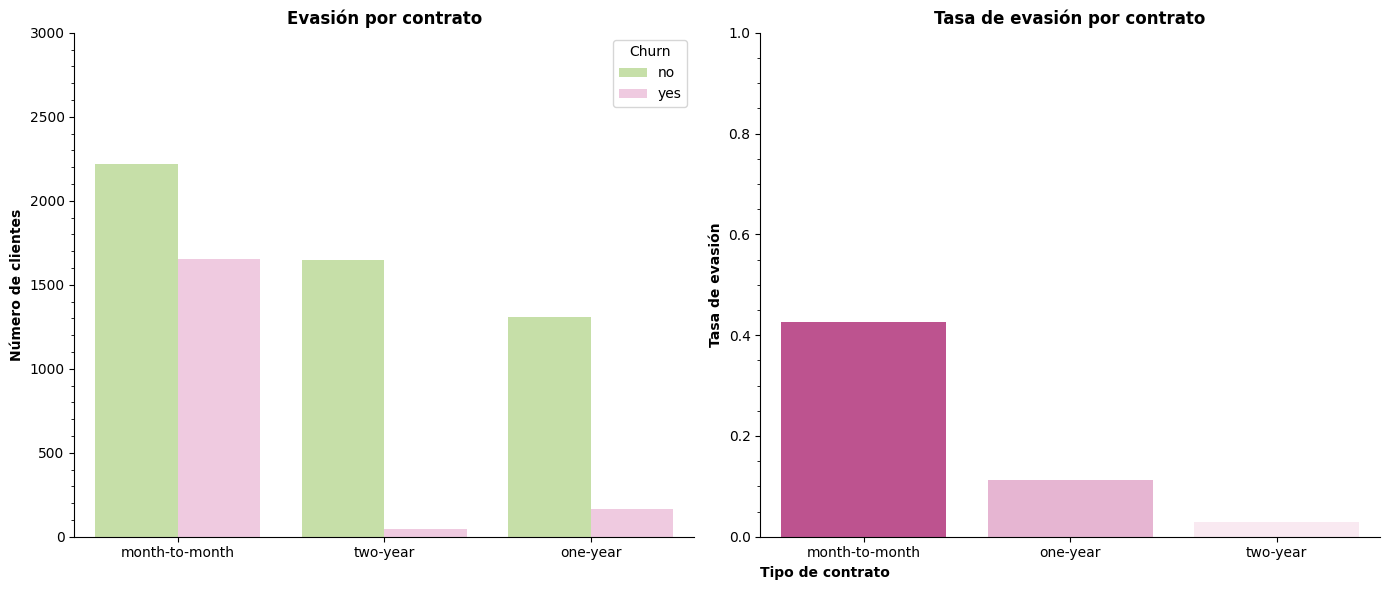

Fig 3.4: A. Número de clientes por contrato y churn. B. Porcentaje de cancelación por tipo de contrato.

Por otra parte, si analizamos los clientes que se no se dieron de baja y los que si se dieron de baja en relación al método de pago (fig. 3.5 izquierda) se observa que la cantidad de clientes que pagan  mediante los formas permitidas son similares, superando el método de pago por correo levemente a los demás formas de pago. En cambio, entre los clientes que hicieron churn, la mayoría pagaba por cheque electrónico, seguido los métodos cheque por correo, transferencia bancaria y tarjeta de crédito.

Si analizamos las tasas de evasión por método de pago de los clientes que abandonaron TelecomX (fig. 3.5 derecha), observamos que de los que pagaban con cheque electrónico el 45% se fueron de la empresa, mientras que los que abonaron con cheque por correo el 19% renunció y, en menor porcentaje, los que pagaron con transferencia bancaria el 17% se dieron de baja. Por último, los clientes que pagaron con tarjeta de crédito se fueron un 15%.

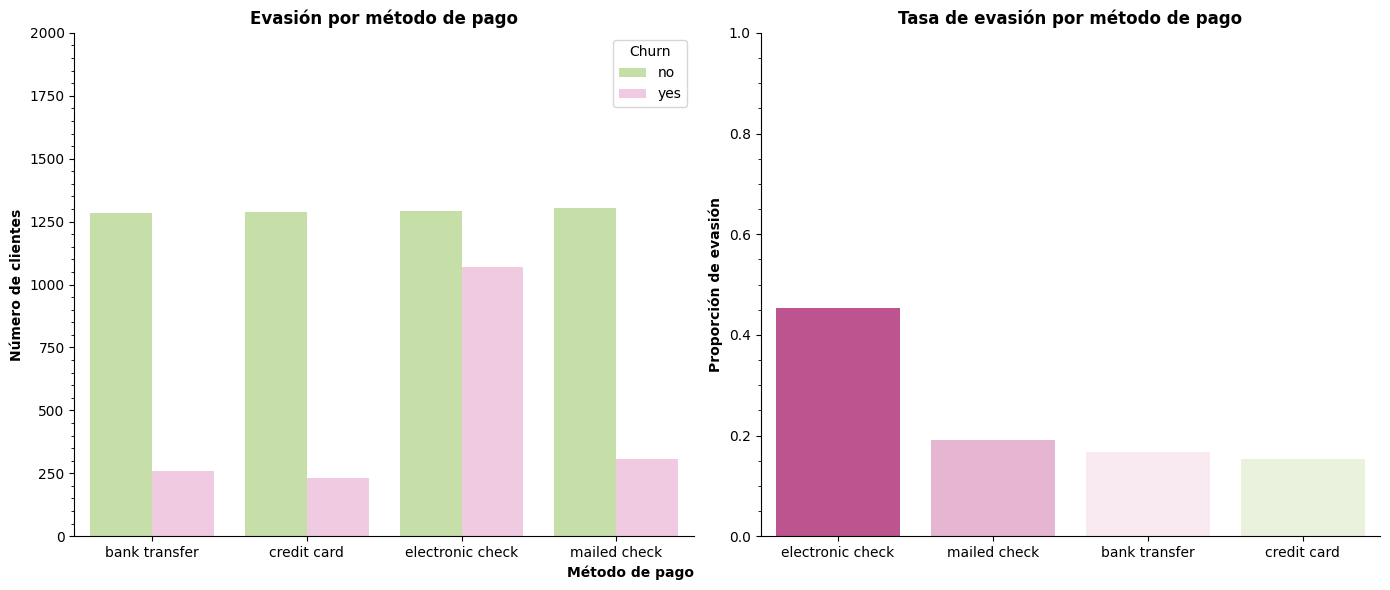
-----------------------------------------------------
Fig 3.5: A. Número de clientes por pago y churn. B. Porcentaje de evasión por tipo de pago.

En el recuento de clientes por servicio de internet y churn (fig. 3.6 izquierda), entre los clientes que no se fueron de la empresa la mayor cantidad tiene el servicio de internet dsl, seguido por fibra óptica y por personas que no tienen el servicio de internet. Por otro lado, los clientes que abandonaron TelecomX, la mayoría tenían fibra óptica, seguido por el servicio dls y, a lo último, los que no tenían internet.

Analizando las proporciones de clientes que se fueron por el tipo de servicio de internet(fig. 3.6 derecha) observamos que de los que tenían fibra óptica el 45% se fueron, de los que tenía dsl el 19% renunció y de los que no tenían servicio de internet solo se fueron el 7%.

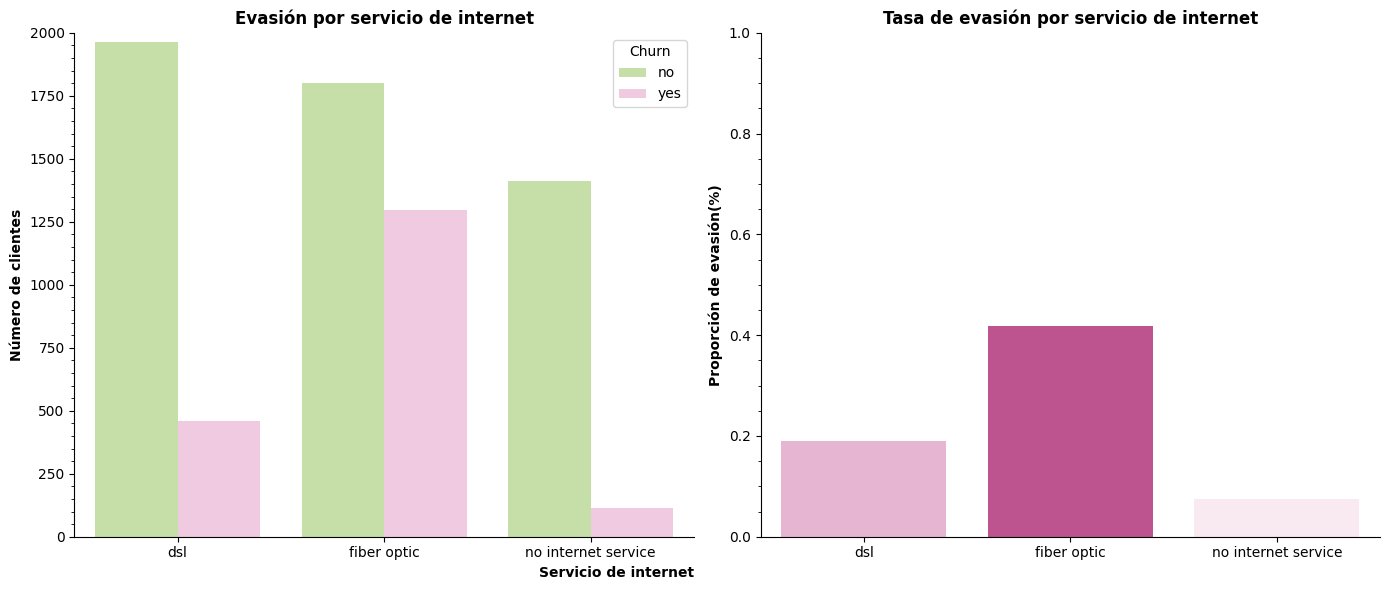
-----------------------------------------------------
Fig 3.6: A. Número de clientes por internet y churn. B. Porcentaje de cancelación por plan de internet.

En el servicio de teléfono se observa que de los clientes que poseen línea telefónica, la mayoría no dio de baja el servicio. Mientras que, de los clientes que no tienen teléfono, la mayor cantidad de clientes no se fue de la empresa. Sin embargo, si observamos la tasa de cancelación, nos damos cuenta que esta tasa es similar entre los clientes que tuvieron y no tuvieron el servicio.

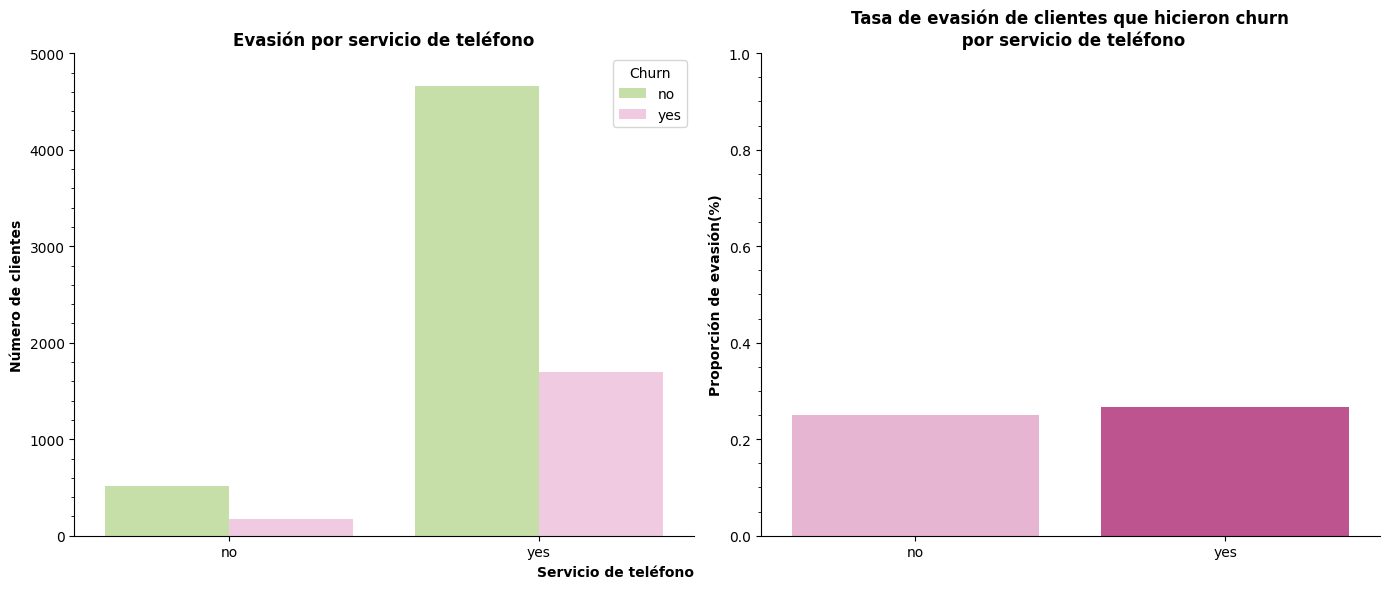

Fig 3.7: A. Número de clientes por servicio de teléfono y churn. B. Porcentaje de cancelación por servicio telefónico.

Si analizamos la permanencia de los clientes diferenciandolos por si cancelaron o no el/los servicio/s de TelecomX, observamos que los clientes que no se dieron de baja se quedan más tiempo que los que hicieron churn(fig. 3.8), el promedio para este grupo de clientes es 38 meses aproximadamente. En cambio, para el grupo de clientes que renunciaron a los servicios de la empresa se dieron de baja en pocos meses, el promedio de permanencia para estas personas fue de 18 meses.
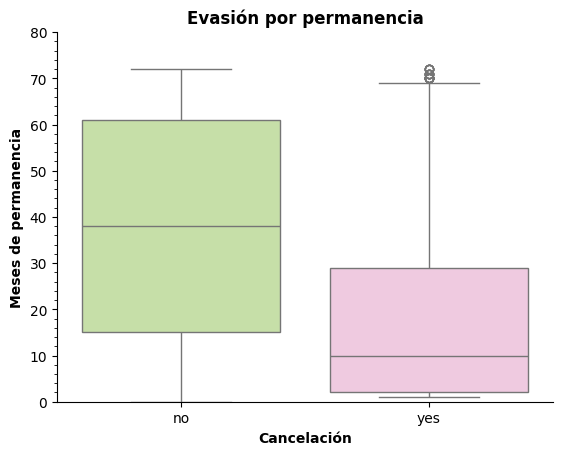
-----------------------------------------------------
Fig 3.8: A. Distribución de la permanencia de los usuarios diferenciados por churn.

En el gráfico de la distribución de cargos mensuales(fig.3.10 A) por evasión observamos que los clientes que no se fueron de la empresa pagan menos que los clientes que si se fueron de la empresa. Un cliente que todavía persiste pagó en promedio 61 pesos mensualmente contra 74pesos que pagaron los que renunciaron a la empresa. En contraposición, si observamos el gráfico de la distribución de cargos totales(fig.3.10 B) los clientes que pagaron más fueron los que no han abandonado la empresa mientras que los que si se fueron pagaron menos. En promedio, los clientes que se quedaron pagaron 2555 pesos y los que se fueron pagaron aproximadamente 1532 pesos.

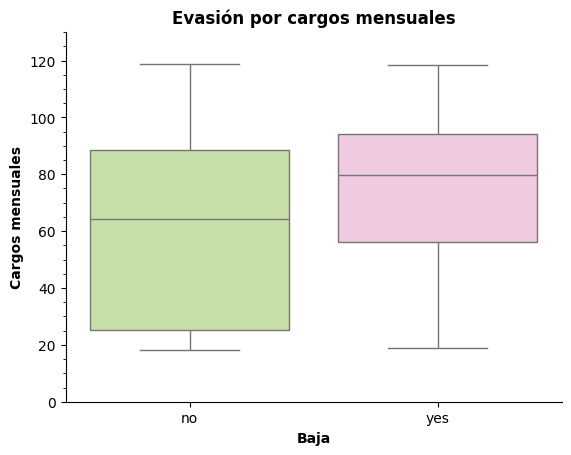


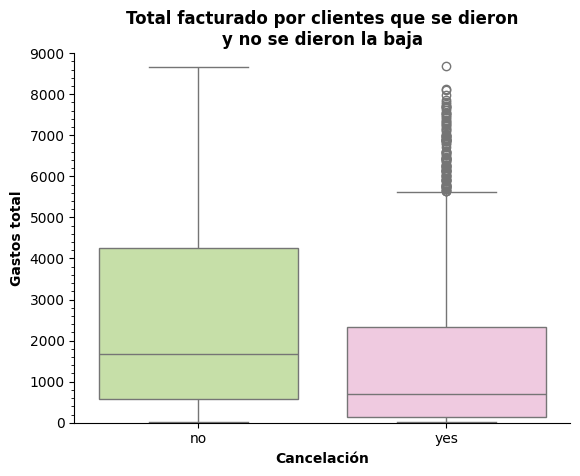


Fig 3.10: A. Distribución de cargos mensuales de los usuarios diferenciados por churn. B. Distribución de cargos totales por churn.

Por otra parte, poniendo énfasis en el número de servicios contratados por los clientes, los usuarios que no renunciaron a la empresa contrataron más servicios que los que se fueron(fig 3.11). La mayoría de los no churners contrataron entre 1 a 5 servicios, mientras que los churners se concentran entre 2 a 4, un rango de poco a moderado servicios.

Analizando el número de servicios por evasión de los clientes, vemos que los que tenían el servicio básico de internet, es decir sin contratar un servicio extra de internet o línea telefónica, el porcentaje de abandono fue de 44%, una alta tasa de renuncia. Le sigue los clientes con 2, 3 y 4 servicios con tasas de abandono de 33%,36% y 31%, respectivamente(fig 3.12).

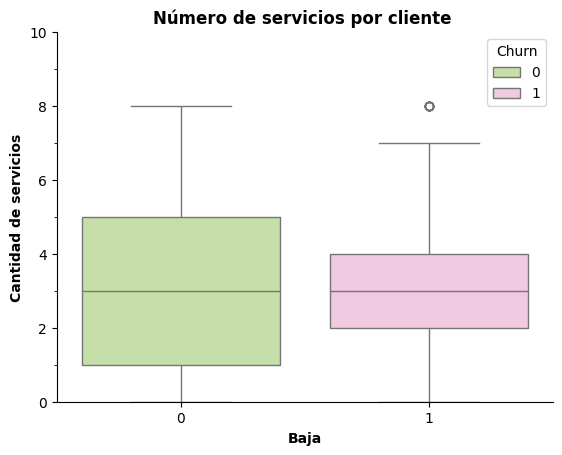
----------------------------------------------------
Fig 3.11:Distribución de número de servicios diferenciados por churn.

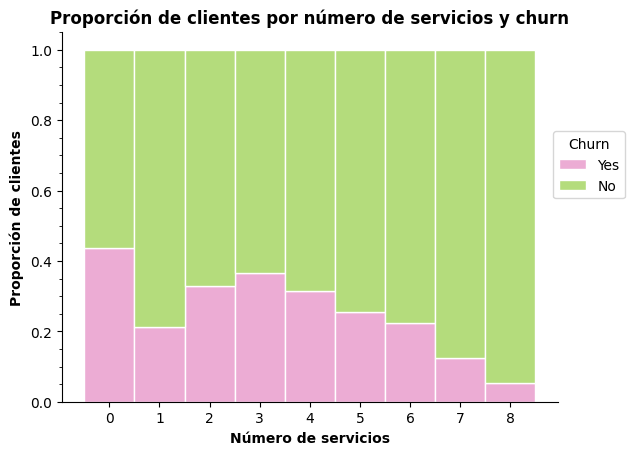
-----------------------------------------------------
Fig 3.12:Frecuencias relativas por número de servicios y churn.

Profundizando la relación entre la fuga de clientes, el número de servicios y el tipo de plan de internet, obtenemos que los clientes que se fueron y tenían internet del tipo dsl  contrataron principalmente entre ningún servicio, adicional al plan de internet, hasta  3 servicios, los que se fueron y tenían fibra óptica contrataron principalmente entre 2 y 5 servicios, con la tasa de contratación más alta para 3 servicios. Por último, los clientes que no contrataron internet tenían exclusivamente 1 servicio, ligados a la línea telefónica(fig 3.13).

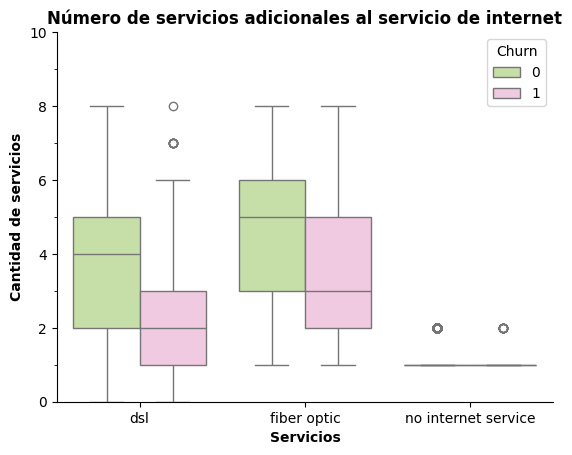
----------------------------------------------------
Fig 3.13:Distribución de número de servicios diferenciados por servicio de internet y churn.



Adicionalmente, se realizó una correlación entre las variables número de servicio y permanencia. El coeficiente que se obtuvo es de 0,60, esto indica una relación lineal positiva entre las dos variables y moderadamente fuerte. Tomamos este resultado como que mayor cantidad de servicios más tiempo de permanencia.

Investigando más profundamente la relación entre el tipo de internet y la permanencia, encontramos que los churners se quedaron menos tiempo en comparación con los no churners(fig. 3.14).

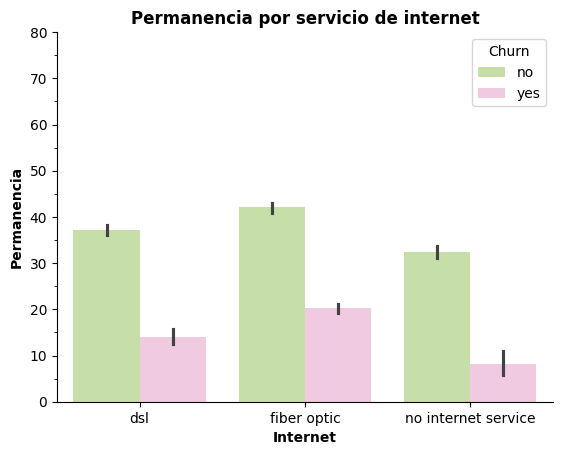
-----------------------------------------------------
Fig 3.14:Distribución de tiempo de permanencia diferenciados por servicio de internet y churn.

Ya comparando entre los mismos churners, se puede observar en el gráfico 3.14 que los usuarios con fibra óptica permanecieron más tiempo que los clientes con dsl o los que simplemente no tenían internet.

Teniendo en cuenta que los usuarios dsl y los sin internet fueron los que menos servicios contrararon y que los de fibra óptica contrataron un número moderado de servicios, esto confirma la relación entre número de servicios y permanencia. A medida que los usuarios adhieren más servicios, el riesgo de fuga disminuye.

## **Conclusiones**
- El género no es un factor que influye en la fuga de clientes.

* Los clientes mayores a 65 años tienen una alta tasa de renuncia(42%) en comparación con los clientes menores de 65 años(24%).

- El tipo de contrato mensual, el método de pago cheque electrónico y el servicio de fibra óptica tienen tasas altas de cancelación.

- Los clientes que renunciaron a los servicios de la empresa pagaron mensualmente más que los clientes que no se fueron. Sin embargo, estos primeros pagaron menos de cargos total que los últimos. Esto se relaciona con el tiempo de permanencia de los clientes, y es que los clientes que se dieron de baja permanecieron menos tiempo que los que no se fueron. En promedio, se quedaron 18 meses.

- El porcentaje de renuncia en el número de servicios es muy alto, 44% para aquellos clientes que no contrataron servicios adicionales de internet o de teléfono. También, destacan las tasas de baja entre los clientes que tenían entre 2 a 4 servicios, cuyas tasas son 33%, 36% y 31% para clientes con 2 servicios, 3 servicios y 4 servicios, respectivamente.

- Los clientes con fibra óptica contrataron desde 1 hasta 8 servicios con porcentajes más alto de contratación para 2, 3, 4 y 5 servicios.

- Los clientes con el servicio de internet dsl contrataron desde el servicio básico hasta 8 servicios, teniendo las tasas más altas de contratación los clientes con 1, 2 y 3 servicios.

- Los clientes que no tenían internet, tenían exclusivamente el servicio telefónico.

- Los clientes churners con pocos servicios tienden a permanecer menos tiempo en la empresa.

## **Implicaciones y recomendaciones**

A partir de los resultados se puede identificar que el problema de la evasión de clientes es un problema multicausal cuyas causas están relacionadas con la satisfacción de cada cliente con el servicio o los servicios contratados.

En los resultados mencionamos cuales son los factores que se relacionan con la diserción de clientes y en este apartado abordamos que implica cada factor.

El análisis de datos muestra que existen al menos dos perfiles evasores en relación a los tipos de servicios contratados, la permanencia de los clientes, el pago mensual, el total facturado y el número de servicios contratados. Estos tipos de clientes son:
- Los usuarios que contrataron fibra óptica y que tienen un paquete de servicios extras.
- Los usuarios que contrataron pocos servicios y de baja permanencia

Los primeros adquirieron principalemte entre 2 a 5 servicios extras. Esto indica que son personas con capacidad de pago, dado que los churners son las personas que más pagaron mensualmente. No obstante, se dan de baja porque no se encuentran satisfechos con los servicios contratados, principalmente con la fibra óptica.

En los segundos usuarios, destacan aquellos con 0 servicios adicionales contratados, con una tasa de cancelación del 44%. En esta franja de clientes, se encuentran las personas que únicamente tenían internet dsl. Además, tenemos que resaltar los usuarios que cancelaron y que tenían un solo servicio. Aunque la tasa de cencelación no es la más alta, el 91% de estos tenían solo línea de teléfono.
Las personas que contrataron dls y servicio de teléfono fueron los que menos tiempo perdudaron.
Esto sugiere que la falta de un mayor número de servicios adicionales o una percepción de valor insuficiente en los servicios básicos los hace más vulnerables a la fuga.

Otro perfil de churn son las personas mayores de 65 años. Estas tienen una tasa de churn que es aproximadamente el doble de la tasa de los menores de 65 años.

Por último, esta el perfil de churn que se relaciona con las características contractuales. Dentro de este perfil se encuentran aquellos que tenían el tipo de contrato mensual y que pagaban a través de pago electrónico.

Por lo tanto, hacemos las siguientes recomendaciones para abordar las cancelaciones en función de cada tipo de perfil identificado:

1.   Mejorar la calidad del servicio fibra óptica, realizando una investigación sobre la experiencia del cliente con este servicio. Esto puede lograrse a través de encuestas, monitoreo de la velocidad y la eficiencia del soporte técnico.
2.   Ofrecer promociones atractivas para clientes con muy pocos servicios. Esto puede conseguirse a través de paquetes de servicios, por ejemplo internet + teléfono o internet + servicio de streaming. Al adquirir estos paquetes, también se les puede otorgar bonificaciones a los clientes para que tengan un tiempo de prueba.
3. Atención específica al segmento etario mayor de 65 años. Elaborar estrategias comerciales y de servicio técnico exclusivamente para esta porción de demográfica.
4. Optimización de métodos de pagos y contratos. Investigar las razones de la alta tasa de cancelaciónes para clientes con contrato mensual y pago por cheque electrónico. Además, se puede incentivar el pago con los otros tipos de pagos a través de bonificaciones. Por ejemplo, un descuento para aquellos clientes que pagan con tarjeta de crédito.












